In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

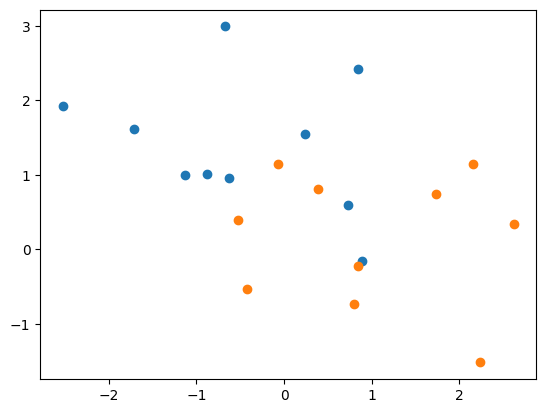

In [21]:
n_clusters=10
finestd=0.2

clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,1])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [1,0])

plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')

In [22]:
def generate_samples(n): 
    index1 = np.random.randint(n_clusters, size=n).astype(int)
    index2 = np.random.randint(n_clusters, size=n).astype(int)
    means1 = clusters_1[index1]
    means2 = clusters_2[index2]
    samples1=np.random.randn (n,2) * finestd + means1
    samples2=np.random.randn (n,2) * finestd + means2
    return(samples1, samples2)

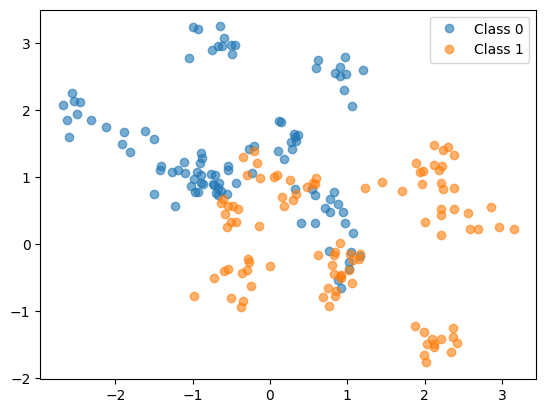

In [23]:
data1, data2 = generate_samples(1000)

plt.subplot()
plt.plot(data1[:,0][:100], data1[:,1][:100], 'o', alpha=0.6,label='Class 0')
plt.plot(data2[:,0][:100], data2[:,1][:100], 'o', alpha=0.6,label='Class 1')

plt.legend()

In [24]:
from sklearn.model_selection import train_test_split

label1=np.full(data1.shape[0],0)
label2=np.full(data2.shape[0],1)

data=np.vstack((data1,data2))
label=np.append(label1,label2)

X_train,X_test,y_train,y_test=train_test_split(data,label,train_size=0.1,random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3).fit(data, label)
knn.score(X_test, y_test)

0.9488888888888889

In [26]:
test_scores=np.array([])
train_scores=np.array([])
k_vals=np.arange(1,150,2)
dof = 2 * 200 / k_vals

for k in k_vals:
    knn=KNeighborsClassifier(n_neighbors=k).fit(data,label)
    train_scores=np.append(train_scores,knn.score(X_train,y_train))
    test_scores=np.append(test_scores,knn.score(X_test,y_test))

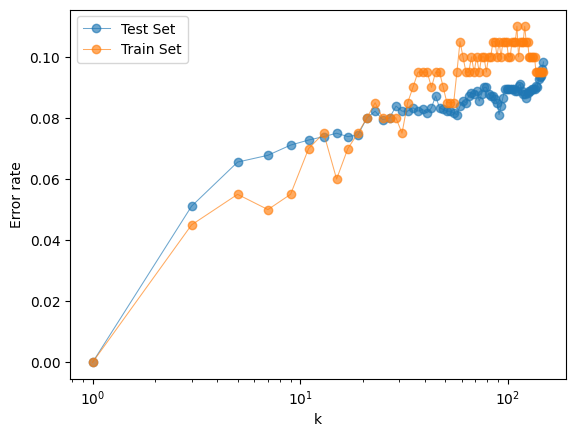

In [27]:
plt.plot(k_vals,1-test_scores,'-o',alpha=0.65,label='Test Set',linewidth=0.75)
plt.plot(k_vals,1-train_scores,'-o',alpha=0.65,label='Train Set',linewidth=0.75)

plt.ylabel('Error rate')
plt.xlabel('k')
plt.xscale('log')
plt.legend()

plt.show()

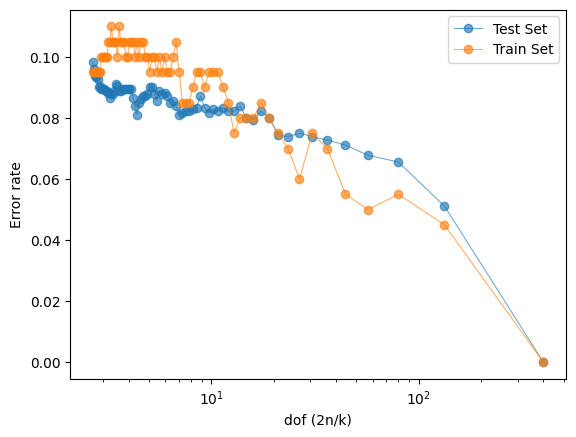

In [28]:
plt.plot(dof,1-test_scores,'-o',alpha=0.65,label='Test Set',linewidth=0.75)
plt.plot(dof,1-train_scores,'-o',alpha=0.65,label='Train Set',linewidth=0.75)

plt.ylabel('Error rate')
plt.xlabel('dof (2n/k)')
plt.xscale('log')
plt.legend()

plt.show()

In [29]:
def prob_class1(x):
    c1 =0
    c2 = 0
    for i in range(clusters_1.shape[0]):
        c1 = c1 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_1[i,:], cov=np.eye(clusters_1.shape[1]) * finestd )  
    for i in range(clusters_2.shape[0]):
        c2 = c2 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_2[i,:], cov=np.eye(clusters_2.shape[1]) * finestd )  
    #return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

0.2210318287440229

In [30]:
sample_prob = prob_class1(X_test)
sample_prob[0:4], y_test[0:5]

(array([0.04978621, 0.87218506, 0.24358536, 0.99865257]),
 array([1, 0, 1, 0, 1]))

In [31]:
bayes_error_est = np.sum(np.equal(sample_prob < 0.5, y_test)) / len(y_test)
1-bayes_error_est

0.10222222222222221

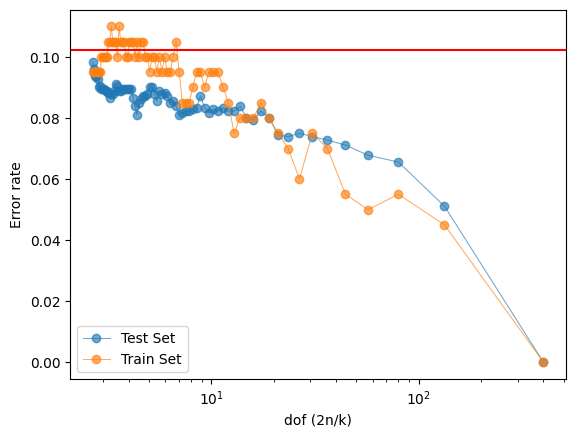

In [32]:
plt.plot(dof,1-test_scores,'-o',alpha=0.65,label='Test Set',linewidth=0.75)
plt.plot(dof,1-train_scores,'-o',alpha=0.65,label='Train Set',linewidth=0.75)

plt.axhline(y=1-bayes_error_est, color='r', linestyle='-')

plt.ylabel('Error rate')
plt.xlabel('dof (2n/k)')
plt.xscale('log')
plt.legend()

plt.show()

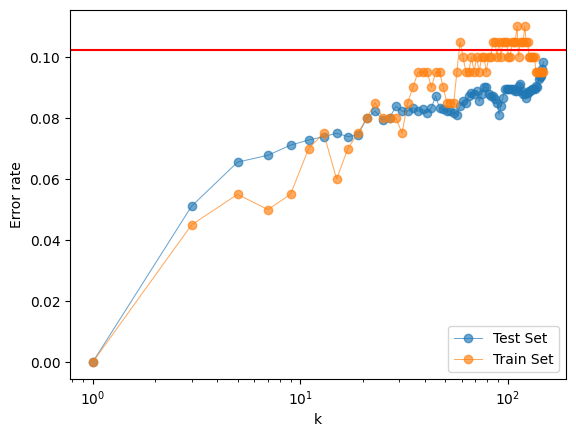

In [34]:
plt.plot(k_vals,1-test_scores,'-o',alpha=0.65,label='Test Set',linewidth=0.75)
plt.plot(k_vals,1-train_scores,'-o',alpha=0.65,label='Train Set',linewidth=0.75)


plt.axhline(y=1-bayes_error_est, color='r', linestyle='-')
plt.ylabel('Error rate')
plt.xlabel('k')
plt.xscale('log')
plt.legend()

plt.show()